# PDO 
* Wenchang Yang (wenchang@princeton.edu)
* Princeton University

In [33]:
from climindex import get_climate_index
from geoplots import mapplot
import xlearn

%matplotlib notebook

In [3]:
pdo = get_climate_index('pdo')
print(pdo)

1900-01-31    0.04
1900-02-28    1.32
1900-03-31    0.49
1900-04-30    0.35
1900-05-31    0.77
1900-06-30    0.65
1900-07-31    0.95
1900-08-31    0.14
1900-09-30   -0.24
1900-10-31    0.23
1900-11-30   -0.44
1900-12-31    1.19
1901-01-31    0.79
1901-02-28   -0.12
1901-03-31    0.35
1901-04-30    0.61
1901-05-31   -0.42
1901-06-30   -0.05
1901-07-31   -0.60
1901-08-31   -1.20
1901-09-30   -0.33
1901-10-31    0.16
1901-11-30   -0.60
1901-12-31   -0.14
1902-01-31    0.82
1902-02-28    1.58
1902-03-31    0.48
1902-04-30    1.37
1902-05-31    1.09
1902-06-30    0.52
              ... 
2016-07-31    1.25
2016-08-31    0.52
2016-09-30    0.45
2016-10-31    0.56
2016-11-30    1.88
2016-12-31    1.17
2017-01-31    0.77
2017-02-28    0.70
2017-03-31    0.74
2017-04-30    1.12
2017-05-31    0.88
2017-06-30    0.79
2017-07-31    0.10
2017-08-31    0.09
2017-09-30    0.32
2017-10-31    0.05
2017-11-30    0.15
2017-12-31    0.50
2018-01-31    0.70
2018-02-28    0.37
2018-03-31   -0.05
2018-04-30  

<IPython.core.display.Javascript object>


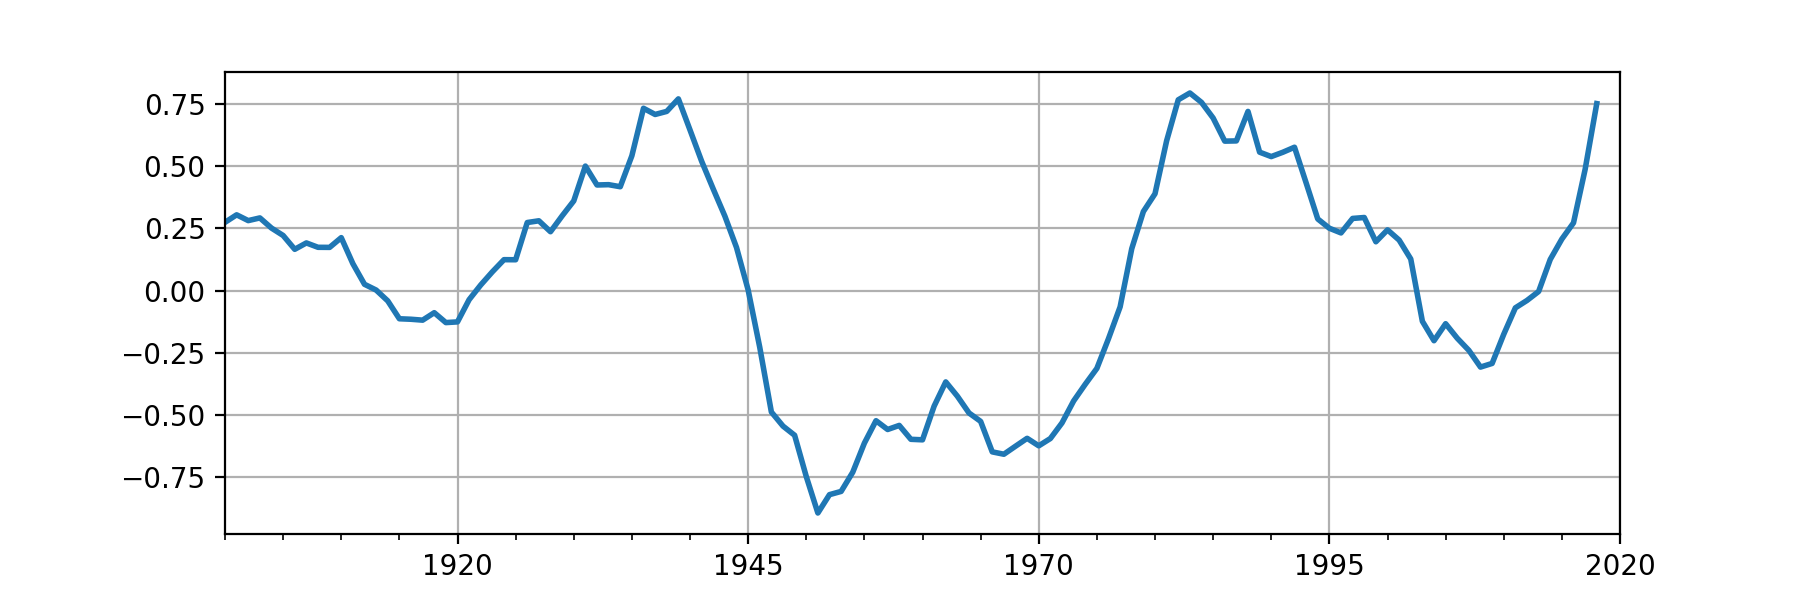

In [21]:
fig = plt.figure(figsize=(9,3))
ts = pdo
# ts.plot()
ts = ts.resample('AS').mean().rolling(11, center=True, min_periods=1).mean()
ts.plot()
plt.xlim('1900', '2020')
plt.grid('on')

In [25]:
import pyingrid as ig
ds = ig.Ingrid('cmap').to_dataset().rename({'T': 'time', 'X': 'lon', 'Y': 'lat'})
ds

<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, time: 474)
Coordinates:
  * time      (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-06-01
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    prcp_est  (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL

In [49]:
tslice = slice('1981', '2010')
da = ds.prcp_est.sel(time=tslice).resample(time='AS').mean('time')
da

/Users/wenchang/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'prcp_est' (time: 30, lat: 72, lon: 144)>
array([[[ 0.310833,  0.304167, ...,  0.3225  ,  0.285833],
        [ 0.18    ,  0.171667, ...,  0.199167,  0.1725  ],
        ..., 
        [ 0.29    ,  0.299167, ...,  0.314167,  0.291667],
        [      nan,       nan, ...,       nan,       nan]],

       [[ 0.2875  ,  0.284167, ...,  0.295   ,  0.260833],
        [ 0.298333,  0.2925  , ...,  0.310833,  0.275   ],
        ..., 
        [ 0.285833,  0.296667, ...,  0.323333,  0.291667],
        [      nan,       nan, ...,       nan,       nan]],

       ..., 
       [[ 0.870833,  0.865   , ...,  0.880833,  0.873333],
        [ 1.0825  ,  1.074167, ...,  1.095833,  1.09    ],
        ..., 
        [ 0.2325  ,  0.2325  , ...,  0.269167,  0.219167],
        [      nan,       nan, ...,       nan,       nan]],

       [[ 0.688333,  0.6775  , ...,  0.7075  ,  0.698333],
        [ 0.925833,  0.910833, ...,  0.953333,  0.941667],
        ..., 
        [ 0.343333,  0.3475  , ...,  0.

In [50]:
m = da.learn.regress(da.time.dt.year)
m

[LinearRegression for xarray]: copy_X=True, fit_intercept=True, n_jobs=-1, normalize_x=False, normalize_y=False.

<IPython.core.display.Javascript object>


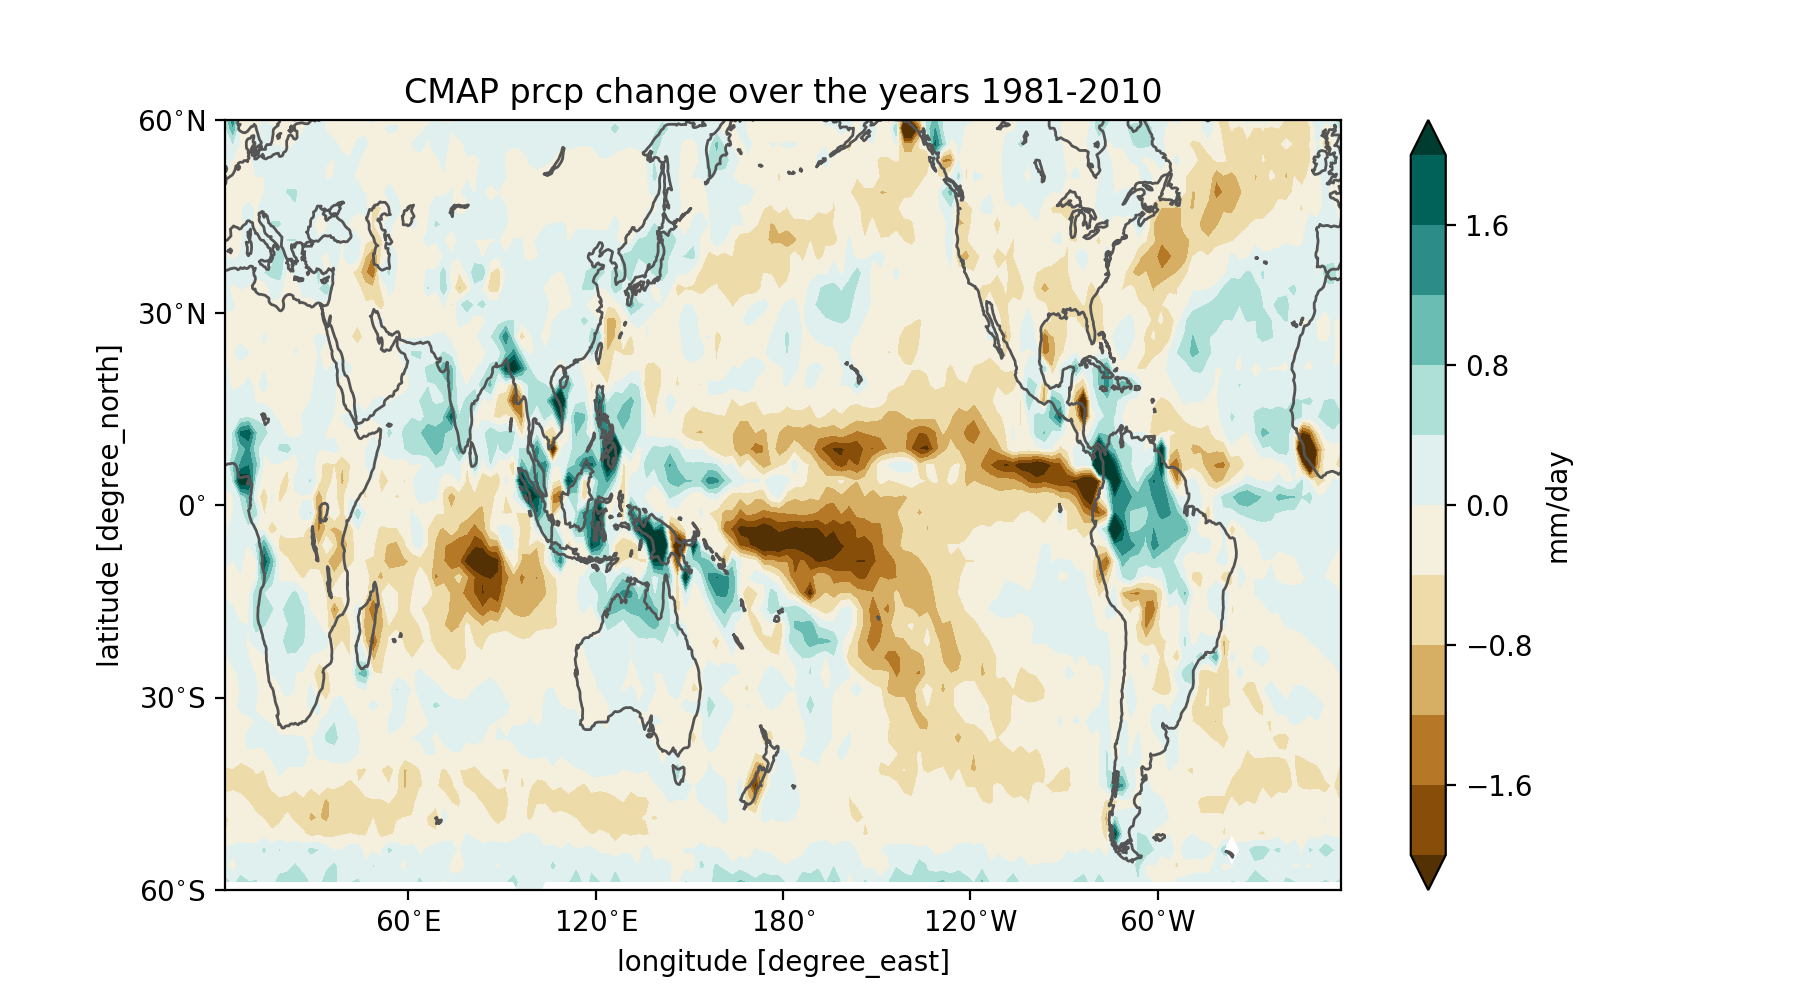

(-60, 60)

In [51]:
fig = plt.figure(figsize=(9,5))
m.coef_da.pipe(lambda x: x*(2010-1981)).rename('mm/day').plot.contourf(cmap='BrBG', robust=True, levels=10)

mapplot()

plt.title('CMAP prcp change over the years 1981-2010')
plt.ylim(-60,60)

In [44]:
tslice = slice('2008', '2017')
da = ds.prcp_est.sel(time=tslice).resample(time='AS').mean('time')
da

/Users/wenchang/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'prcp_est' (time: 10, lat: 72, lon: 144)>
array([[[ 0.396667,  0.393333, ...,  0.4025  ,  0.4     ],
        [ 0.504167,  0.5     , ...,  0.511667,  0.5075  ],
        ..., 
        [ 0.29    ,  0.296667, ...,  0.309167,  0.265833],
        [      nan,       nan, ...,       nan,       nan]],

       [[ 0.870833,  0.865   , ...,  0.880833,  0.873333],
        [ 1.0825  ,  1.074167, ...,  1.095833,  1.09    ],
        ..., 
        [ 0.2325  ,  0.2325  , ...,  0.269167,  0.219167],
        [      nan,       nan, ...,       nan,       nan]],

       ..., 
       [[ 0.715   ,  0.740833, ...,  0.715   ,  0.7     ],
        [ 0.866667,  0.913333, ...,  0.681667,  0.676667],
        ..., 
        [ 0.231667,  0.230833, ...,  0.265833,  0.221667],
        [      nan,       nan, ...,       nan,       nan]],

       [[ 0.393333,  0.44    , ...,  0.4075  ,  0.405833],
        [ 0.644167,  0.7     , ...,  0.405833,  0.4125  ],
        ..., 
        [ 0.253333,  0.2525  , ...,  0.

In [45]:
m = da.learn.regress(da.time.dt.year)
m

[LinearRegression for xarray]: copy_X=True, fit_intercept=True, n_jobs=-1, normalize_x=False, normalize_y=False.

<IPython.core.display.Javascript object>


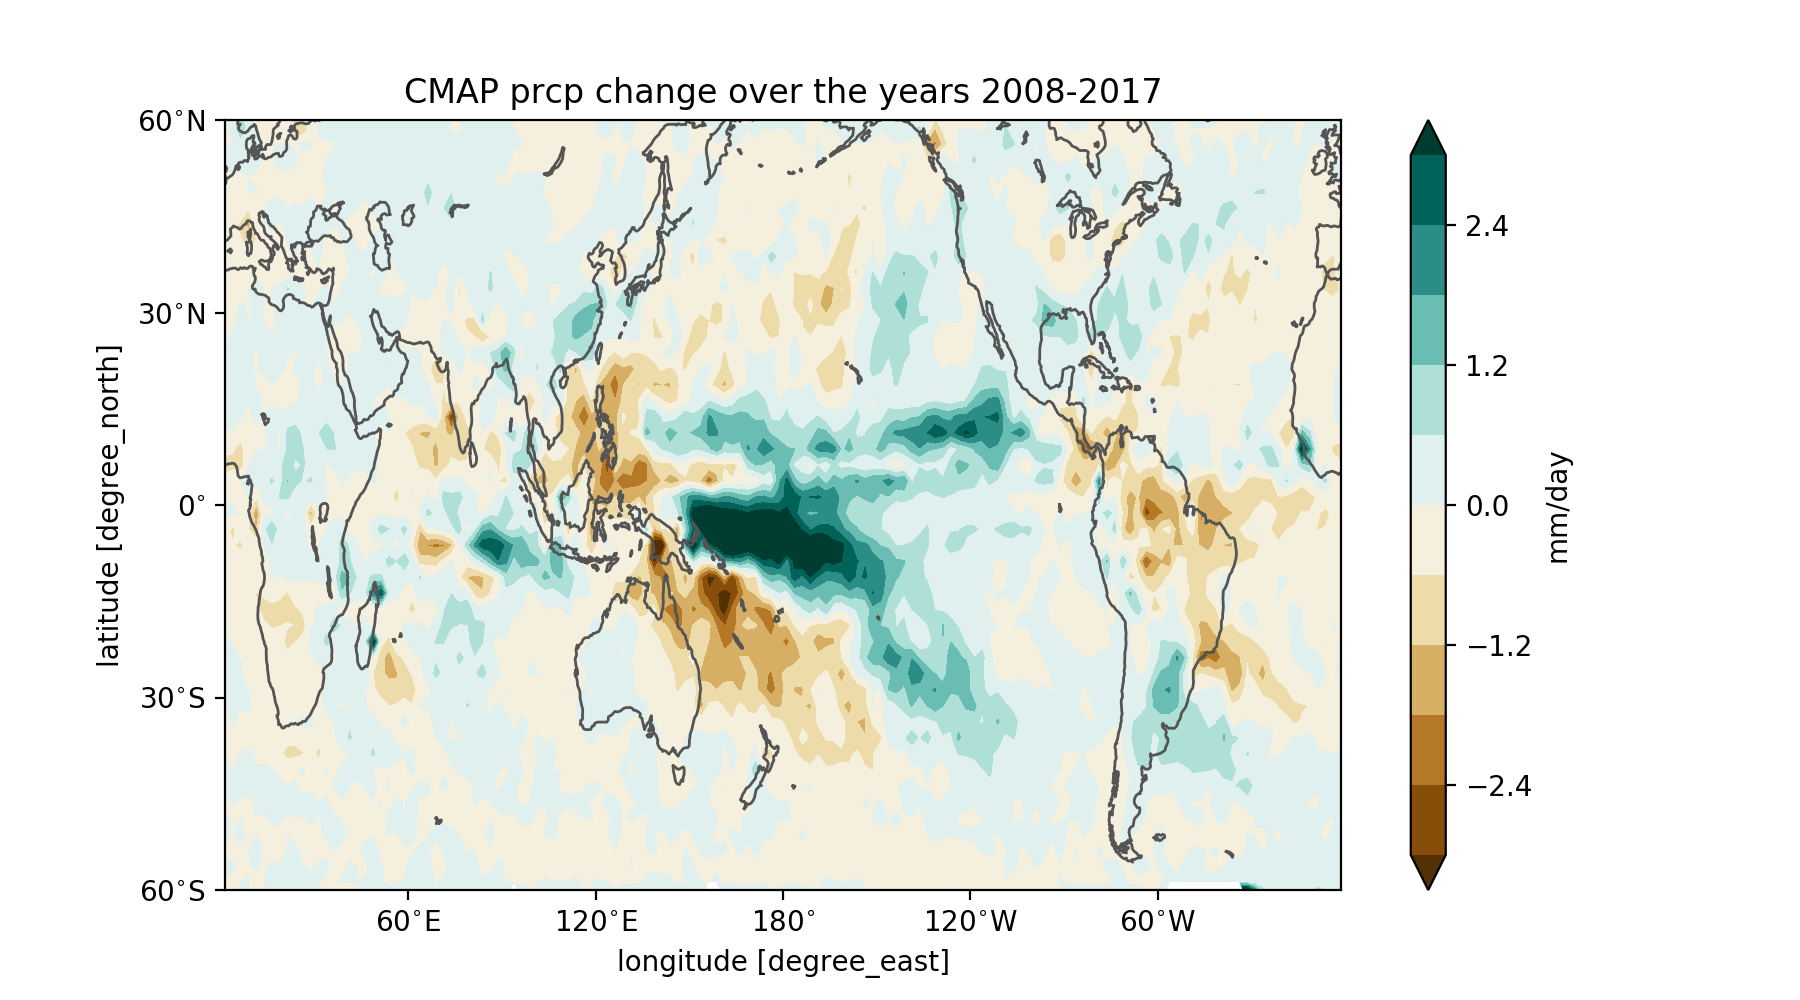

(-60, 60)

In [48]:
fig = plt.figure(figsize=(9,5))
m.coef_da.pipe(lambda x: x*(2017-2008)).rename('mm/day').plot.contourf(cmap='BrBG', robust=True, levels=10)

mapplot()

plt.title('CMAP prcp change over the years 2008-2017')
plt.ylim(-60,60)

In [47]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js">
</script>